<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/lecture-notes/Techcareer_01_10_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

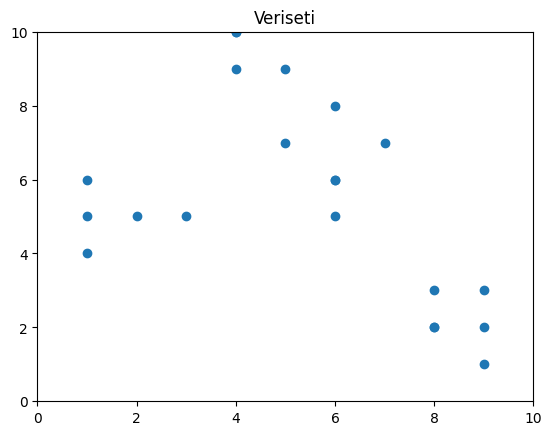

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,\
              7,8,9,8,9,9,8,4,4,5,4])

x2 = np.array([5,4,5,5,6,5,8,6,7,6,7,\
              2,1,2,3,2,3,9,10,9,10])

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Veriseti')
plt.scatter(x1, x2)
plt.show()

# *Veri kümeleri ve merkez noktaları uzaklık hesaplamaları*

In [3]:
# distortion: mean squared distance or average within-cluster variance
bozulma = [] # veri noktalarının küme merkezlerine olan ortalama uzaklığı
atalet = [] # total within-cluster sum of squares
map1 = {}
map2 = {}

# Bozulma = 1/n * toplam(uzaklık(nokta, ağırlık merkezleri)^2)

# Atalet = toplam(uzaklık(nokta, ağırlık merkezleri)^2)

K = range(1,10)

for k in K:
  # n_init parameter, controls the number of times
  # the algorithm will be run with different initializations
  kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X) # model oluşturma
  kmeanModel.fit(X) # model eğitme
  bozulma.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                  'euclidean'), axis=1))/X.shape[0])
  atalet.append(kmeanModel.inertia_)
  map1[k]=sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),
                     axis=1))/X.shape[0]
  map2[k] = kmeanModel.inertia_

for key, val in map1.items():
  print(f'{key} : {val}')

1 : 3.4475489368765606
2 : 2.118732796090454
3 : 1.3243285881358255
4 : 0.8733796436558107
5 : 0.7720518879071977
6 : 0.6936911309576965
7 : 0.6358032177504376
8 : 0.566877357128005
9 : 0.49171360465225095


Inertia, on the other hand, is the total within-cluster sum of squares, which is the sum of squared distances of all data points to their respective cluster centers. While inertia provides information about the spread of data points within each cluster, it does not directly indicate the quality of individual data point assignments.

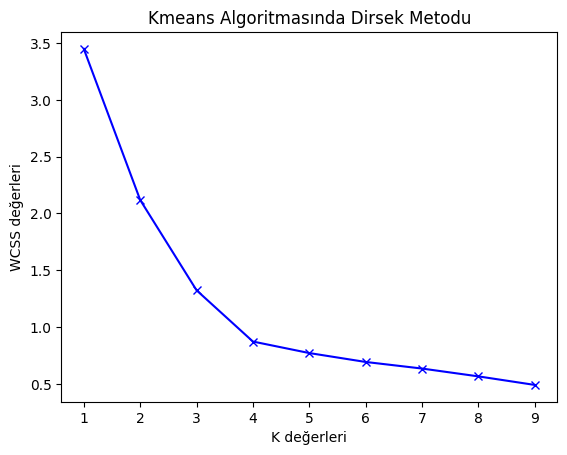

In [4]:
plt.plot(K,bozulma,'bx-')
plt.xlabel('K değerleri')
plt.ylabel('WCSS değerleri')
plt.title('Kmeans Algoritmasında Dirsek Metodu')
plt.show()